Here we test vector mehtods

In [7]:
import vector
import numpy as np
import time

start_time = time.time()

# Generating dummy data for vbf1
np.random.seed(42)
vbf1 = vector.array(
    {
        "pt": np.random.rand(5),
        "phi": np.random.rand(5),
        "eta": np.random.rand(5),
        "M": np.random.rand(5),
    }
)

# Generating dummy data for vbf2
vbf2 = vector.array(
    {
        "pt": np.random.rand(5),
        "phi": np.random.rand(5),
        "eta": np.random.rand(5),
        "M": np.random.rand(5),
    }
)

# Generating dummy data for VVJet
VVJet = vector.array(
    {
        "pt": np.random.rand(5),
        "phi": np.random.rand(5),
        "eta": np.random.rand(5),
        "M": np.random.rand(5),
    }
)

# Generating dummy data for bbJet
bbJet = vector.array(
    {
        "pt": np.random.rand(5),
        "phi": np.random.rand(5),
        "eta": np.random.rand(5),
        "M": np.random.rand(5),
    }
)

end_time = time.time()
elapsed_time = end_time - start_time

print(vbf1)
print(vbf2)
print(VVJet)
print(bbJet)
print(f"\nTime taken: {elapsed_time:.6f} seconds")

system_4momentum = vbf1 + vbf2 + VVJet + bbJet

# Boost using boost_p4
vbf1_boosted_p4 = vbf1.boostCM_of_p4(system_4momentum)
# vbf1_boosted_p4 = vbf1.boost_p4(-system_4momentum)

# Boost using to_beta3
vbf1_boosted_beta = vbf1.boost(-system_4momentum.to_beta3())

# Compare the results
difference = vbf1_boosted_p4 - vbf1_boosted_beta

print(f"difference: {difference}")

[(0.37454012, 0.15599452, 0.02058449, 0.18340451)
 (0.95071431, 0.05808361, 0.96990985, 0.30424224)
 (0.73199394, 0.86617615, 0.83244264, 0.52475643)
 (0.59865848, 0.60111501, 0.21233911, 0.43194502)
 (0.15601864, 0.70807258, 0.18182497, 0.29122914)]
[(0.61185289, 0.78517596, 0.60754485, 0.80839735)
 (0.13949386, 0.19967378, 0.17052412, 0.30461377)
 (0.29214465, 0.51423444, 0.06505159, 0.09767211)
 (0.36636184, 0.59241457, 0.94888554, 0.68423303)
 (0.45606998, 0.04645041, 0.96563203, 0.44015249)]
[(0.12203823, 0.66252228, 0.96958463, 0.92187424)
 (0.49517691, 0.31171108, 0.77513282, 0.0884925 )
 (0.03438852, 0.52006802, 0.93949894, 0.19598286)
 (0.9093204 , 0.54671028, 0.89482735, 0.04522729)
 (0.25877998, 0.18485446, 0.59789998, 0.32533033)]
[(0.38867729, 0.54269608, 0.77224477, 0.72900717)
 (0.27134903, 0.14092422, 0.19871568, 0.77127035)
 (0.82873751, 0.80219698, 0.00552212, 0.07404465)
 (0.35675333, 0.07455064, 0.81546143, 0.35846573)
 (0.28093451, 0.98688694, 0.70685734, 0.1158690

In [8]:
import vector

# Define two particles A and B with momentum along z-axis
particle_A = vector.obj(pt=0, eta=0, phi=0, M=100)
particle_B = vector.obj(pt=0, eta=0, phi=0, M=50)

# Calculate the 4-momentum of the system (sum of A and B)
system_4momentum = particle_A + particle_B

# Boost both particles to the center of mass frame using boost_p4 method
particle_A_boosted_p4 = particle_A.boost_p4(-system_4momentum)
particle_B_boosted_p4 = particle_B.boost_p4(-system_4momentum)

# Boost both particles to the center of mass frame using to_beta3 method and then boost
system_beta3 = system_4momentum.to_beta3()
particle_A_boosted_beta3 = particle_A.boost(system_beta3)
particle_B_boosted_beta3 = particle_B.boost(system_beta3)

particle_A_boosted_p4, particle_B_boosted_p4, particle_A_boosted_beta3, particle_B_boosted_beta3

(MomentumObject4D(px=nan, py=nan, pz=nan, mass=100),
 MomentumObject4D(px=nan, py=nan, pz=nan, mass=50),
 MomentumObject4D(px=0.0, py=0.0, pz=0.0, mass=100),
 MomentumObject4D(px=0.0, py=0.0, pz=0.0, mass=50))

Next we test how eta changes when we boost. if we boost a particle together will its eta double?? lets test it. also test how it changes under CM operation

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def to_four_momentum(pt, phi, eta, m):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    E = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    return E, px, py, pz


def lorentz_transform(p, gamma, beta):
    E, px, py, pz = p
    bp = beta[0] * px + beta[1] * py + beta[2] * pz
    factor = gamma * E - bp
    E_prime = gamma * E - bp
    px_prime = px + beta[0] * (factor + E / (gamma + 1))
    py_prime = py + beta[1] * (factor + E / (gamma + 1))
    pz_prime = pz + beta[2] * (factor + E / (gamma + 1))
    return E_prime, px_prime, py_prime, pz_prime


def boost_particles(particles, beta_vector):
    gamma = 1.0 / np.sqrt(1.0 - np.sum(beta_vector**2))
    return np.array([lorentz_transform(p, gamma, beta_vector) for p in particles])


# Particle data
massive_pt = np.array([200, 250])
massive_phi = np.array([0, 0])
massive_eta = np.array([1, 1.1])
massive_m = np.array([100, 100])

smaller_pt = np.array([30, 40, 20, 25])
smaller_phi = np.array([0, 0, 0, 0])
smaller_eta = np.array([1.5, -1.3, 2, -2.2])
smaller_m = np.array([10, 10, 10, 10])

# Manual boost
massive_particles = np.array(
    [
        to_four_momentum(pt, phi, eta, m)
        for pt, phi, eta, m in zip(massive_pt, massive_phi, massive_eta, massive_m)
    ]
)
smaller_particles = np.array(
    [
        to_four_momentum(pt, phi, eta, m)
        for pt, phi, eta, m in zip(smaller_pt, smaller_phi, smaller_eta, smaller_m)
    ]
)
all_particles = np.concatenate([massive_particles, smaller_particles])
boost_vector = (
    -(massive_particles[0] + massive_particles[1])[:3] / massive_particles[0][0]
)  # px, py, pz divided by energy
boosted_particles_manual = boost_particles(all_particles, boost_vector)

# Vector library boost (pseudo code for reference)
"""
import vector

# Generating the particles
massive_particles = vector.obj(pt=massive_pt, phi=massive_phi, eta=massive_eta, m=massive_m)
smaller_particles = vector.obj(pt=smaller_pt, phi=smaller_phi, eta=smaller_eta, m=smaller_m)
all_particles = vector.concatenate([massive_particles, smaller_particles])

# Calculating the boost vector
total_4momentum = massive_particles[0] + massive_particles[1]
boost_vector = -total_4momentum.to_beta3()

# Applying the boost
boosted_particles_vector = all_particles.boost(boost_vector)
"""

# Visualization code would follow here, comparing `boosted_particles_manual` with `boosted_particles_vector`

/tmp/ipykernel_675063/3765333115.py:22: RuntimeWarning: invalid value encountered in sqrt
  gamma = 1.0 / np.sqrt(1.0 - np.sum(beta_vector**2))


'\nimport vector\n\n# Generating the particles\nmassive_particles = vector.obj(pt=massive_pt, phi=massive_phi, eta=massive_eta, m=massive_m)\nsmaller_particles = vector.obj(pt=smaller_pt, phi=smaller_phi, eta=smaller_eta, m=smaller_m)\nall_particles = vector.concatenate([massive_particles, smaller_particles])\n\n# Calculating the boost vector\ntotal_4momentum = massive_particles[0] + massive_particles[1]\nboost_vector = -total_4momentum.to_beta3()\n\n# Applying the boost\nboosted_particles_vector = all_particles.boost(boost_vector)\n'

Momentum sum before boost: [1094.647799    565.            0.         -141.81896375]


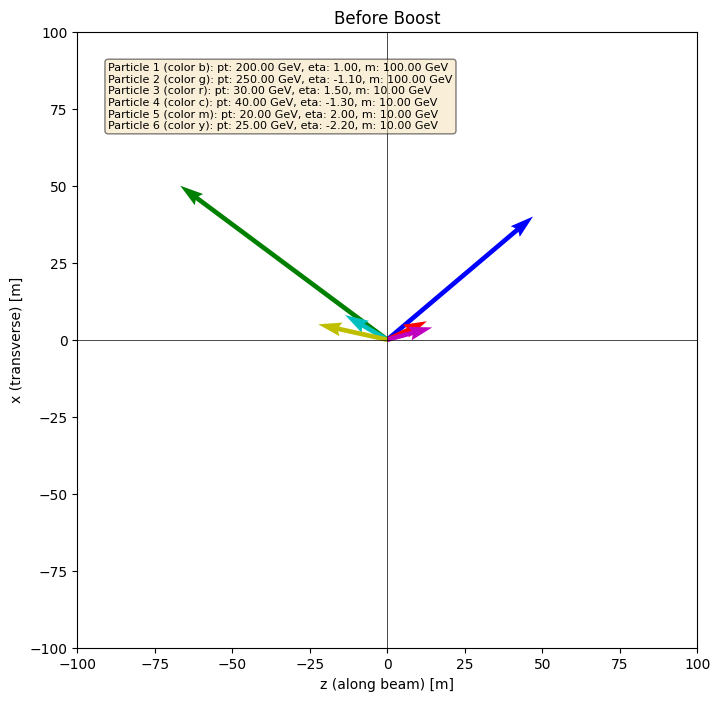

Momentum sum after boost: [9.26777312e+02 2.84217094e-14 0.00000000e+00 1.42108547e-14]


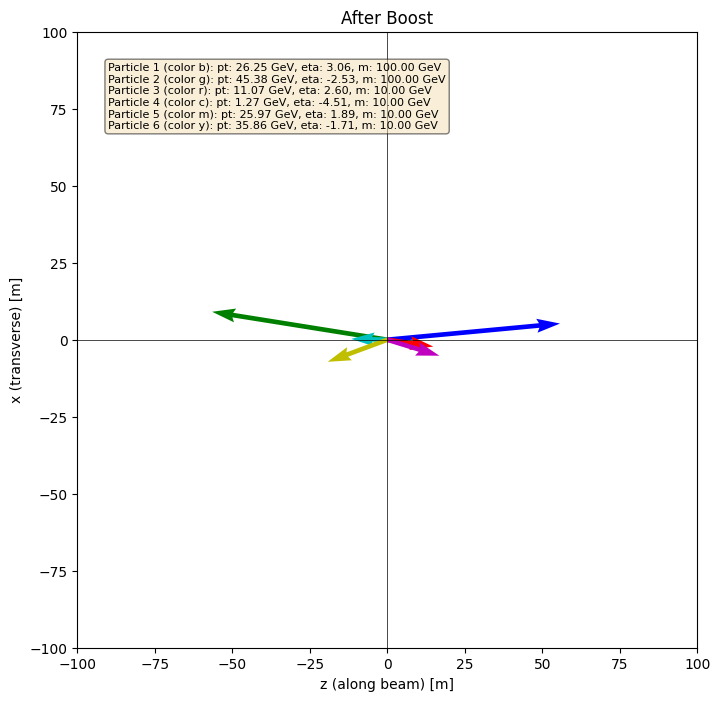

In [43]:
import numpy as np
import matplotlib.pyplot as plt


def to_four_momentum(pt, phi, eta, m):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    E = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    return E, px, py, pz


def lorentz_transform(p, boost_vector):
    gamma = 1 / np.sqrt(1 - np.dot(boost_vector, boost_vector))
    E, px, py, pz = p
    E_prime = gamma * (E - np.dot(p[1:], boost_vector))
    spatial_part = (
        np.array(p[1:])
        + (gamma - 1)
        * np.dot(p[1:], boost_vector)
        / np.dot(boost_vector, boost_vector)
        * boost_vector
        - gamma * E * boost_vector
    )
    return E_prime, *spatial_part


def get_eta(px, pz):
    pt = np.sqrt(px**2)
    theta = np.arccos(pz / np.sqrt(px**2 + pz**2))
    eta = -np.log(np.tan(theta / 2))
    return eta


def plot_particles(particles, title=""):
    colors = ["b", "g", "r", "c", "m", "y"]
    fig, ax = plt.subplots(figsize=(8, 8))
    for idx, particle in enumerate(particles):
        ax.quiver(
            0,
            0,
            particle[3],
            particle[1],
            angles="xy",
            scale_units="xy",
            scale=5,
            color=colors[idx],
        )
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.set_ylabel("x (transverse) [m]")
    ax.set_xlabel("z (along beam) [m]")
    ax.set_title(title)

    # Adding labels
    labels = []
    for idx, particle in enumerate(particles):
        pt = np.sqrt(particle[1] ** 2)
        eta = get_eta(particle[1], particle[3])
        mass = np.sqrt(particle[0] ** 2 - (particle[1] ** 2 + particle[2] ** 2 + particle[3] ** 2))
        label = f"Particle {idx+1} (color {colors[idx]}): pt: {pt:.2f} GeV, eta: {eta:.2f}, m: {mass:.2f} GeV"
        labels.append(label)
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    ax.text(
        0.05,
        0.95,
        "\n".join(labels),
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment="top",
        bbox=props,
    )
    plt.show()


# Define particles
particles = [
    to_four_momentum(200, 0, 1, 100),
    to_four_momentum(250, 0, -1.1, 100),
    to_four_momentum(30, 0, 1.5, 10),
    to_four_momentum(40, 0, -1.3, 10),
    to_four_momentum(20, 0, 2, 10),
    to_four_momentum(25, 0, -2.2, 10),
]

# Print momentum sum before boost
momentum_sum_before = np.sum(particles, axis=0)
print("Momentum sum before boost:", momentum_sum_before)

# Plot original particles
plot_particles(particles, title="Before Boost")

# Determine boost vector for all 6 particles
total_E = np.sum([p[0] for p in particles])
total_px = np.sum([p[1] for p in particles])
total_py = np.sum([p[2] for p in particles])
total_pz = np.sum([p[3] for p in particles])

boost_vector = np.array([total_px / total_E, total_py / total_E, total_pz / total_E])

# Apply boost to particles
boosted_particles = [lorentz_transform(p, boost_vector) for p in particles]

# Print momentum sum after boost
momentum_sum_after = np.sum(boosted_particles, axis=0)
print("Momentum sum after boost:", momentum_sum_after)

# Plot boosted particles
plot_particles(boosted_particles, title="After Boost")

print(system_4vec)
print(particles)
print(boosted_particles)

Using vector package to do the same computation:

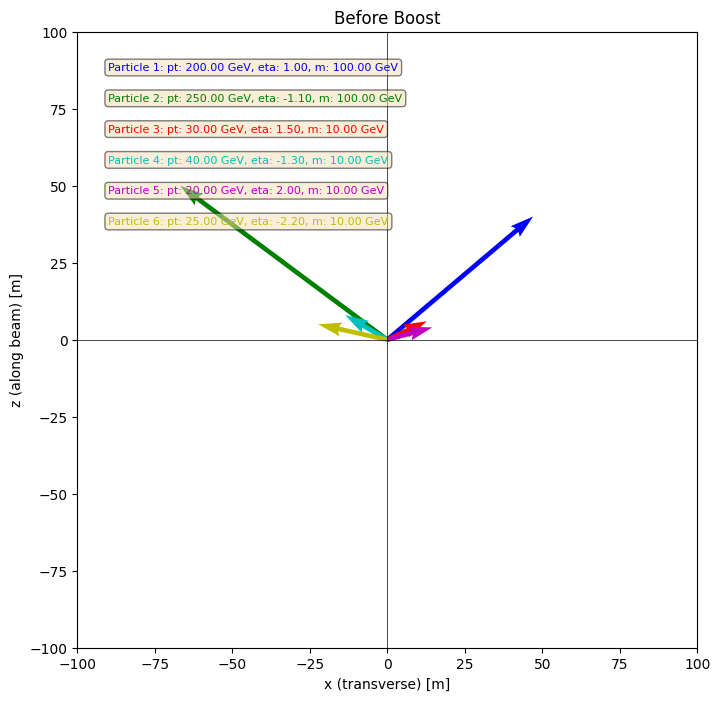

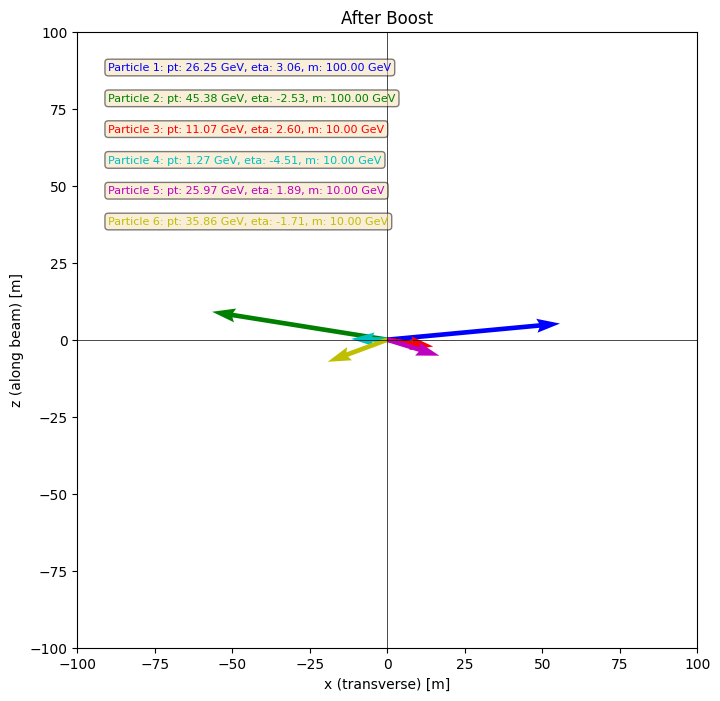

MomentumObject4D(pt=565.0, phi=0.0, eta=-0.24844329419577088, mass=926.7773116469677)
[MomentumObject4D(pt=200, phi=0, eta=1, mass=100), MomentumObject4D(pt=250, phi=0, eta=-1.1, mass=100), MomentumObject4D(pt=30, phi=0, eta=1.5, mass=10), MomentumObject4D(pt=40, phi=0, eta=-1.3, mass=10), MomentumObject4D(pt=20, phi=0, eta=2, mass=10), MomentumObject4D(pt=25, phi=0, eta=-2.2, mass=10)]
-3.141592653589793


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import vector


def plot_particles(particles, title=""):
    colors = ["b", "g", "r", "c", "m", "y"]
    fig, ax = plt.subplots(figsize=(8, 8))
    for idx, particle in enumerate(particles):
        ax.quiver(
            0,
            0,
            particle.pz,
            particle.px,
            angles="xy",
            scale_units="xy",
            scale=5,
            color=colors[idx],
        )
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.set_xlabel("x (transverse) [m]")
    ax.set_ylabel("z (along beam) [m]")
    ax.set_title(title)

    # Adding colored labels
    for idx, particle in enumerate(particles):
        label = f"Particle {idx+1}: pt: {particle.pt:.2f} GeV, eta: {particle.eta:.2f}, m: {particle.M:.2f} GeV"
        props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
        ax.text(
            0.05,
            0.95 - 0.05 * idx,
            label,
            transform=ax.transAxes,
            fontsize=8,
            verticalalignment="top",
            bbox=props,
            color=colors[idx],
        )

    plt.show()


# Define particles using pt, eta, phi, and m
particles = [
    vector.obj(pt=200, eta=1, phi=0, M=100),
    vector.obj(pt=250, eta=-1.1, phi=0, M=100),
    vector.obj(pt=30, eta=1.5, phi=0, M=10),
    vector.obj(pt=40, eta=-1.3, phi=0, M=10),
    vector.obj(pt=20, eta=2, phi=0, M=10),
    vector.obj(pt=25, eta=-2.2, phi=0, M=10),
]

# Plot original particles
plot_particles(particles, title="Before Boost")

# Compute the combined system four-momentum
system_4vec = sum(particles, vector.obj(pt=0, eta=0, phi=0, M=0))

# Compute the boost to the center of mass frame
boost_vector = system_4vec

# Apply the boost to each particle
boosted_particles = [particle.boostCM_of_p4(boost_vector) for particle in particles]

# Plot boosted particles
plot_particles(boosted_particles, title="After Boost")

print(system_4vec)
print(particles)
print(boosted_particles[5].phi)

Now that we have implemented both, we need to confirm that our system momuentum calculation is correct by checking. sometyhing is off about the mass. Then we should alse try to do everything without having to convert into 4momentum. THen we can implement it and test to make sure its doing the same as the vector method and if it actually provides a speed up.

In [9]:
import numpy as np


def to_four_momentum(pt, phi, eta, m):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    E = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    return E, px, py, pz


def lorentz_transform(p, boost_vector):
    gamma = 1 / np.sqrt(1 - np.dot(boost_vector, boost_vector))
    print("doting", boost_vector, np.dot(boost_vector, boost_vector))
    E, px, py, pz = p
    E_prime = gamma * (E - np.dot(p[1:], boost_vector))
    spatial_part = (
        np.array(p[1:])
        + (gamma - 1)
        * np.dot(p[1:], boost_vector)
        / np.dot(boost_vector, boost_vector)
        * boost_vector
        - gamma * E * boost_vector
    )
    print(spatial_part)
    return E_prime, *spatial_part


def from_four_momentum(E, px, py, pz):
    pt = np.sqrt(px**2 + py**2)
    phi = np.arctan2(py, px)
    theta = np.arccos(pz / np.sqrt(px**2 + py**2 + pz**2))
    eta = -np.log(np.tan(theta / 2))
    m = np.sqrt(E**2 - (px**2 + py**2 + pz**2))
    return pt, phi, eta, m


def boost_particle_to_system_frame(particles, other_particle):
    # Convert given particles to four-momentum
    particles_4momentum = [to_four_momentum(*particle) for particle in particles]

    # Compute the total 4-momentum of the system
    total_E = sum(p[0] for p in particles_4momentum)
    total_px = sum(p[1] for p in particles_4momentum)
    total_py = sum(p[2] for p in particles_4momentum)
    total_pz = sum(p[3] for p in particles_4momentum)
    boost_vector = np.array([total_px / total_E, total_py / total_E, total_pz / total_E])

    # Convert other particle to four-momentum
    other_particle_4momentum = to_four_momentum(*other_particle)

    # Boost the other particle
    boosted_other_particle_4momentum = lorentz_transform(other_particle_4momentum, boost_vector)

    # Convert the boosted particle back to (pt, phi, eta, m) coordinates
    return from_four_momentum(*boosted_other_particle_4momentum)


# Define particles
particles = [
    (200, 0, 1, 100),
    (250, 0, -1.1, 100),
    (30, 0, 1.5, 10),
    (40, 0, -1.3, 10),  # (20, 0, 2, 10),(25, 0, -2.2, 10)
]

# Define other particle
other_particle = (200, 0, 1, 100)  # (25, 0, -2.2, 10)

# Boost other particle to the frame of the particle system
boosted_other_particle = boost_particle_to_system_frame(particles, other_particle)
print(boosted_other_particle)

doting [ 0.57515279  0.         -0.11384546] 0.3437615249040406
[  4.29383884   0.         273.77821941]
(4.293838836820981, 0.0, 4.848345862873094, 100.00000000000007)


In [10]:
import numpy as np
import time


def to_four_momentum(pt, phi, eta, m):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    E = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    return E, px, py, pz


def compute_spatial_part(E, px, py, pz, boost_vector, boost_vector_dot_product):
    gamma = 1.0 / np.sqrt(1.0 - boost_vector_dot_product)

    # Dot product of momentum and boost vector
    p_dot_v = px * boost_vector[0] + py * boost_vector[1] + pz * boost_vector[2]

    # Lorentz transformation for the spatial components
    px_prime = (
        px
        + (gamma - 1) * p_dot_v * boost_vector[0] / boost_vector_dot_product
        - gamma * E * boost_vector[0]
    )
    py_prime = (
        py
        + (gamma - 1) * p_dot_v * boost_vector[1] / boost_vector_dot_product
        - gamma * E * boost_vector[1]
    )
    pz_prime = (
        pz
        + (gamma - 1) * p_dot_v * boost_vector[2] / boost_vector_dot_product
        - gamma * E * boost_vector[2]
    )

    return px_prime, py_prime, pz_prime


# Generate example data for a single event
vbf1 = {"pt": 200, "eta": 1, "phi": 0, "M": 100}
vbf2 = {"pt": 250, "eta": -1.1, "phi": 0, "M": 100}
VVJet = {"pt": 30, "eta": 1.5, "phi": 0, "M": 10}
bbJet = {"pt": 40, "eta": -1.3, "phi": 0, "M": 10}

start_time = time.time()

# Method 1
E1, px1, py1, pz1 = to_four_momentum(vbf1["pt"], vbf1["phi"], vbf1["eta"], vbf1["M"])
E2, px2, py2, pz2 = to_four_momentum(vbf2["pt"], vbf2["phi"], vbf2["eta"], vbf2["M"])
EVV, pxVV, pyVV, pzVV = to_four_momentum(VVJet["pt"], VVJet["phi"], VVJet["eta"], VVJet["M"])
Ebb, pxbb, pybb, pzbb = to_four_momentum(bbJet["pt"], bbJet["phi"], bbJet["eta"], bbJet["M"])

total_E = EVV + Ebb + E1 + E2
total_px = pxVV + pxbb + px1 + px2
total_py = pyVV + pybb + py1 + py2
total_pz = pzVV + pzbb + pz1 + pz2
CM_boost_vector = np.array([total_px / total_E, total_py / total_E, total_pz / total_E])
boost_vector_dot_product = (
    CM_boost_vector[0] ** 2 + CM_boost_vector[1] ** 2 + CM_boost_vector[2] ** 2
)

px1_boosted, py1_boosted, pz1_boosted = compute_spatial_part(
    E1, px1, py1, pz1, CM_boost_vector, boost_vector_dot_product
)
px2_boosted, py2_boosted, pz2_boosted = compute_spatial_part(
    E2, px2, py2, pz2, CM_boost_vector, boost_vector_dot_product
)

theta1 = np.arccos(pz1_boosted / np.sqrt(px1_boosted**2 + py1_boosted**2 + pz1_boosted**2))
theta2 = np.arccos(pz2_boosted / np.sqrt(px2_boosted**2 + py2_boosted**2 + pz2_boosted**2))

print("Method 1 results:")
print(CM_boost_vector)
print(px1_boosted, py1_boosted, pz1_boosted)
print("Cos(Theta) for vbf1:", np.cos(theta1))
print("Cos(Theta) for vbf2:", np.cos(theta2))

Method 1 results:
[ 0.57515279  0.         -0.11384546]
4.293838836820981 0.0 273.77821941033505
Cos(Theta) for vbf1: 0.9998770344139399
Cos(Theta) for vbf2: -0.9983078101890982


In [11]:
import vector
import numpy as np


# Define a function to convert pt, eta, phi, mass to a vector object
def to_vector(pt, eta, phi, mass):
    return vector.obj(pt=pt, eta=eta, phi=phi, mass=mass)


# Generate example data for a single event
vbf1 = to_vector(200, 1, 0, 100)
vbf2 = to_vector(250, -1.1, 0, 100)
VVJet = to_vector(30, 1.5, 0, 10)
bbJet = to_vector(40, -1.3, 0, 10)

# Create a combined 4-momentum for the system
system_4vec = vbf1 + vbf2 + VVJet + bbJet

# Boost the vectors into the center-of-mass frame of the system
j1_CMF = vbf1.boostCM_of_p4(system_4vec)
j2_CMF = vbf2.boostCM_of_p4(system_4vec)

# Calculate the theta values using the boosted eta
thetab1 = 2 * np.arctan(np.exp(-j1_CMF.eta))
thetab2 = 2 * np.arctan(np.exp(-j2_CMF.eta))

print("Method 2 results:")
print("Cos(Theta) for vbf1:", np.cos(thetab1))
print("Cos(Theta) for vbf2:", np.cos(thetab2))

Method 2 results:
Cos(Theta) for vbf1: 0.9998770344139398
Cos(Theta) for vbf2: -0.9983078101890981
